<h1 align="center"> TP 1 </h1>

## Importing the data

In [1]:
preference <- read.table("preference.txt")
taille <- read.table("taille.txt")


## Transforming the data into a dataframe

,Taille,Preferences
,<int>,<chr>
1,138,oui
2,164,non
3,150,non
4,132,oui
5,144,oui
6,125,oui


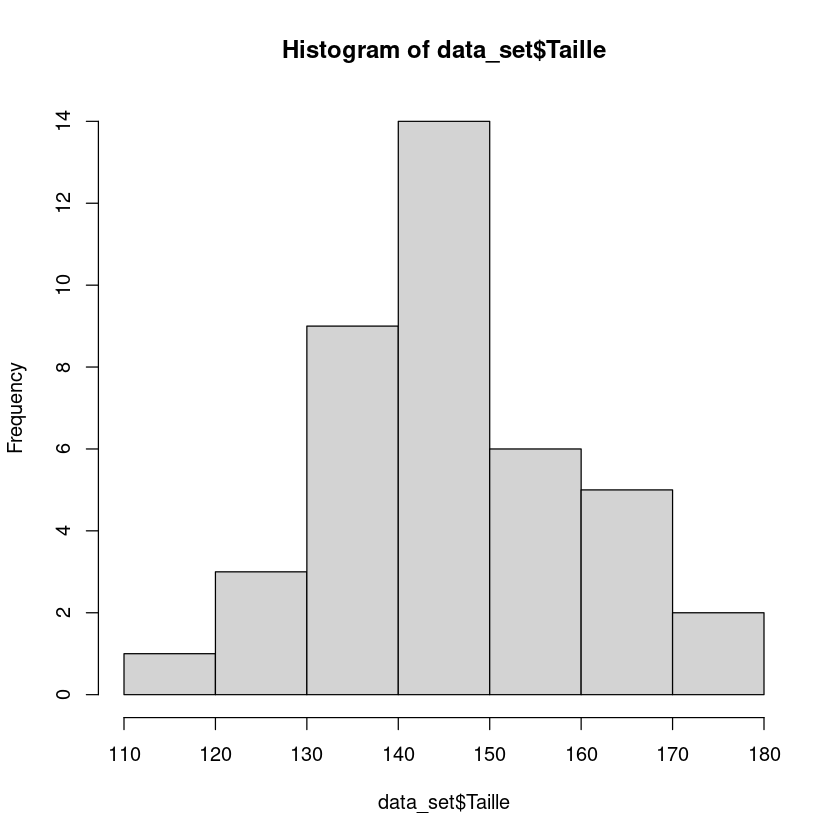

In [35]:
data_set <- data.frame(taille, preference)
names(data_set) <- c("Taille", "Preferences")
head(data_set)
hist(data_set$Taille)

## changing data type of preferences to factor

In [3]:
data_set$Preferences <- as.factor(data_set$Preferences)

In [4]:
attach(data_set)

## La moyenne

In [5]:
moyenne <- mean(Taille)
moyenne

[1] 146.8

## La variance

In [6]:
var <- var(Taille)
var

[1] 170.3179

## L'ecart type

In [7]:
ecart_type <- sd(Taille)
ecart_type

[1] 13.05059

## Le mode

In [8]:
# Fonction pour calculer le mode
calculer_mode <- function(x) {
  table_x <- table(x)
  modes <- as.numeric(names(table_x[table_x == max(table_x)]))
  return(modes)
}
mode <- calculer_mode(Taille)
mode

[1] 135

## La mediane

In [9]:
mediane <- median(Taille)
mediane

[1] 146

## L'ecart inter decile

In [26]:
deciles <- quantile(Taille, probs = seq(0, 1, by = 0.1))
ecart_inter_decile <- deciles[10] - deciles[2]
ecart_inter_decile

90% 
32.5

In [11]:
coefficient_variation <- (ecart_type / moyenne) * 100
coefficient_variation

[1] 8.890049

## Groupment des donnes en 10 classes

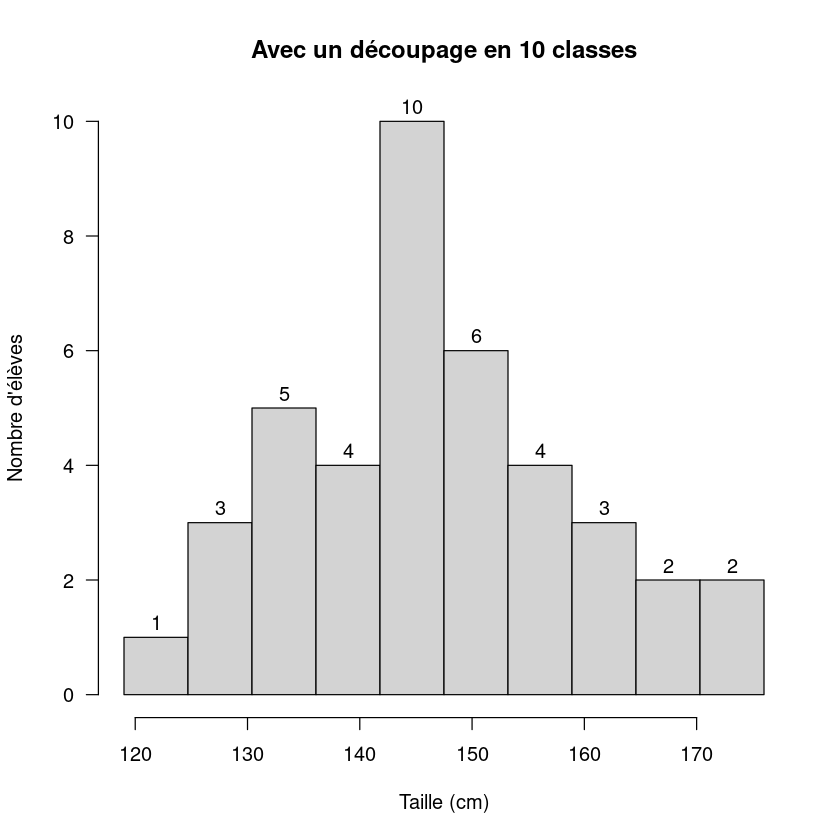

In [12]:


hist_10 <- hist(Taille,
  breaks = seq(min(Taille), max(Taille), length = 11),
  labels = TRUE, las = 1, xlab = "Taille (cm)", ylab = "Nombre d'élèves",
  main = "Avec un découpage en 10 classes"
)

## Groupment des donnes en 5 classes

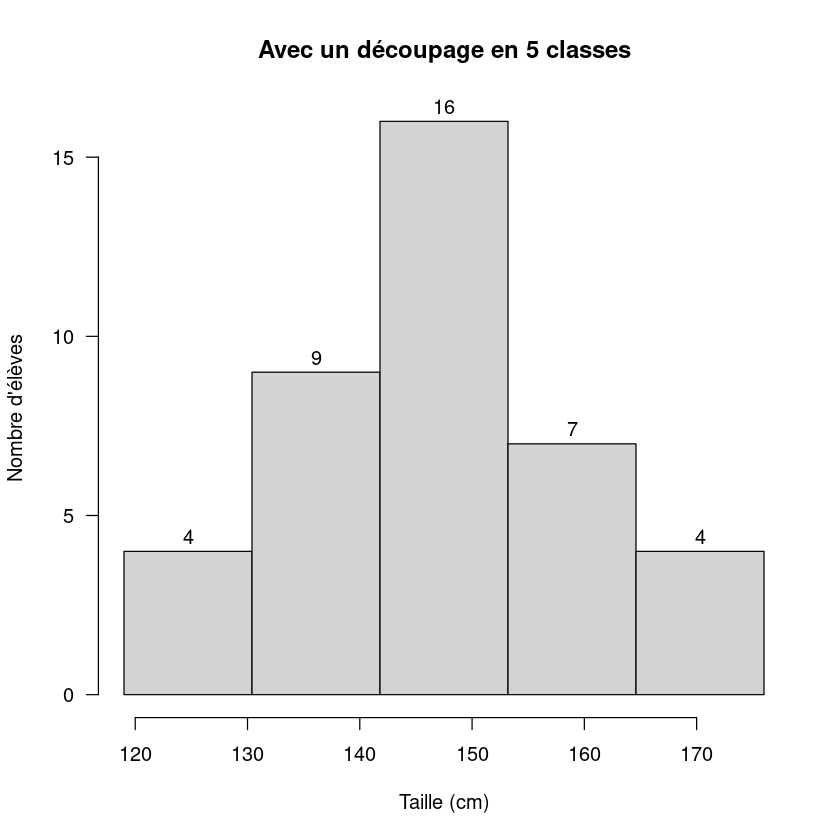

In [13]:
hist_5 <- hist(Taille,
               breaks = seq(from = min(Taille), to = max(Taille), length = 6),
               labels = TRUE, las = 1, xlab = "Taille (cm)",
               ylab = "Nombre d'élèves",
               main = "Avec un découpage en 5 classes")

In [14]:
moyenne_5 <- weighted.mean(hist_5$mids, hist_5$counts)
moyenne_5

[1] 146.93

In [15]:
moyenne_10 <- weighted.mean(hist_10$mids, hist_10$counts)
moyenne_10

[1] 146.645

           
class_10    non oui
  (119,125]   0   0
  (125,130]   0   3
  (130,136]   2   3
  (136,142]   1   3
  (142,148]   6   4
  (148,153]   3   3
  (153,159]   2   2
  (159,165]   3   0
  (165,170]   1   1
  (170,176]   0   2

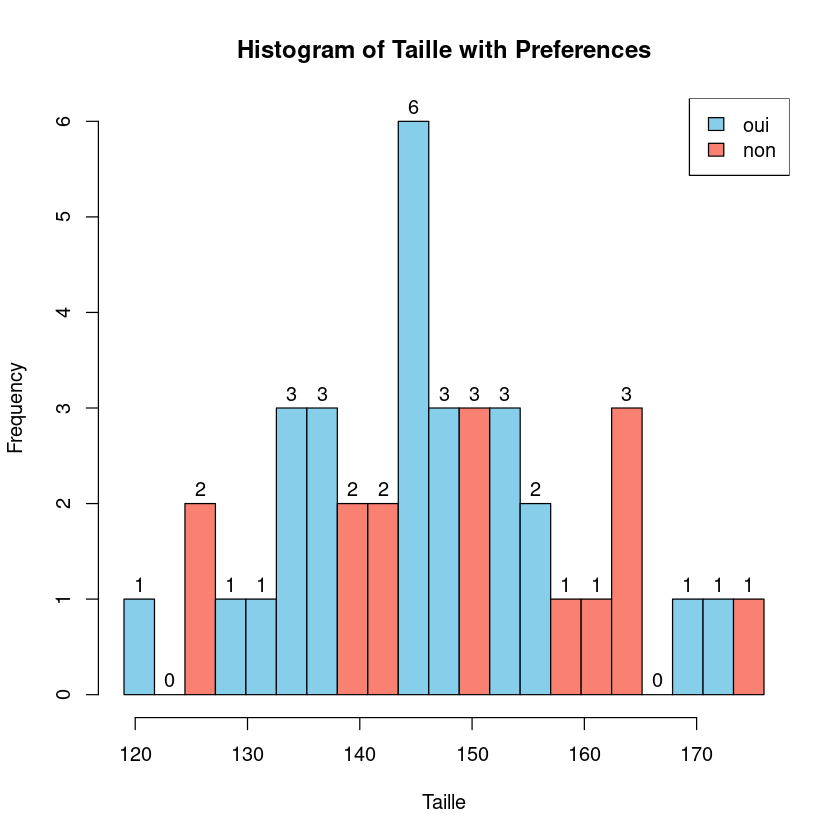

In [32]:

class_10 <- cut(Taille,
  breaks = seq(from = min(Taille), to = max(Taille), length = 11)
)
data_set$Taille_Group <- cut(
  Taille,
  breaks = seq(from = min(Taille), to = max(Taille), length = 11),
  labels = FALSE
)
table_result <- table(class_10, data_set$Preferences)
table_result
# Create histogram
hist(Taille,
  labels = TRUE,
  breaks = seq(from = min(Taille), to = max(Taille), length = 22),
  col = ifelse(data_set$Preferences == "oui", "skyblue", "salmon"),
  border = "black",
  main = "Histogram of Taille with Preferences",
  xlab = "Taille", ylab = "Frequency"
)

# Add legend
legend("topright", legend = c("oui", "non"), fill = c("skyblue", "salmon"))

In [17]:
class_10 <- cut(Taille,
  breaks = seq(from = min(Taille), to = max(Taille), length = 11)
)
levels <- levels(class_10)
levels <- as.array(levels)
table(levels)

levels
(119,125] (125,130] (130,136] (136,142] (142,148] (148,153] (153,159] (159,165] 
        1         1         1         1         1         1         1         1 
(165,170] (170,176] 
        1         1 

In [18]:
summary(data_set)

     Taille      Preferences  Taille_Group   
 Min.   :119.0   non:18      Min.   : 2.000  
 1st Qu.:138.0   oui:22      1st Qu.: 7.000  
 Median :146.0               Median : 9.000  
 Mean   :146.8               Mean   : 9.872  
 3rd Qu.:154.5               3rd Qu.:12.500  
 Max.   :176.0               Max.   :19.000  
                             NA's   :1       